# Basic Statistics in Python + Some Other Useful Tools

This workbook shows some fundamental statistical concepts that are important in exploratory data analysis. It is critical you have a solid understanding of these concepts before we get into data science concepts.

In [2]:
#the usual modules (but they have some stats functions)
import numpy as np
import pandas as pd

#modules used for statistics
import math
import statistics
from scipy import stats

# Mean, Median, Mode, and Central Tendency 

Mean = sum of all numbers / total number of values, balance point
- there are three types of means commonly used to understand data, but we are only talking about the arithmetic mean here. Feel free to look up harmonic and geometric means if you're interested.

Median = middle number, outliers and skewed data have a smaller impact on median

Mode = number that occurs most often


In [49]:
belize_listings_path = "belize_airbnb_listings.csv"
belize_df = pd.read_csv(belize_listings_path)
belize_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203


In [10]:
belize_df[["price","minimum_nights","number_of_reviews","reviews_per_month"]].mean()

price                357.102289
minimum_nights         2.263948
number_of_reviews     14.453505
reviews_per_month      0.538088
dtype: float64

In [11]:
belize_df[["price","minimum_nights","number_of_reviews","reviews_per_month"]].median()

price                220.000
minimum_nights         2.000
number_of_reviews      2.000
reviews_per_month      0.275
dtype: float64

In [12]:
belize_df[["price","minimum_nights","number_of_reviews","reviews_per_month"]].mode()

,price,minimum_nights,number_of_reviews,reviews_per_month
0,151,1.0,0.0,0.08
1,252,NaN,NaN,NaN


Text(0, 0.5, 'Frequency')

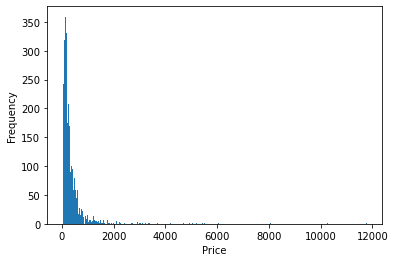

In [16]:
import matplotlib.pyplot as plt
n_bins = 10
min_val, max_val = belize_df['price'].min(), belize_df['price'].max()

n,bins,patches = plt.hist(x=belize_df['price'],bins='auto')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Variance 

Variance measure how dispersed the data points are from the mean. Low variance means the data points are pretty similar whereas high indicates they're more widely spread out from the mean.

Variance is weird to interpret. With the price example, its basically like saying the data points are, on average, x square dollars away from the mean.  

A variance of 0 means that all data is the same.

In [43]:
#function for variance
def variance(data, ddof=0):
    n = len(data)
    mean = sum(data) / n
    return sum((x - mean) ** 2 for x in data) / (n - ddof)

In [25]:
#population variance 
variance(belize_df['price'])

316996.1526270922

In [45]:
#sample variance
variance(belize_df['price'],ddof=1)

317109.56806631474

In [46]:
#population variance
statistics.pvariance(belize_df['price'])

316996.15262709244

In [47]:
#sample variance
statistics.variance(belize_df['price'])

317109.568066315

# Standard Deviation 

Standard deviation is the squareroot of the variance. Population and sample standard deviation are calculated the same, but the variance they are derived from is different. 

In [38]:
#population standard deviation
statistics.pstdev(belize_df['price'])

563.0241137172478

In [39]:
#sample standard deviation
statistics.stdev(belize_df['price'])

563.1248245871558

# Covariance and Correlation

Covariance tells how much and to what existent two random variables change together. It is important to note that it does NOT indicate the dependency between variables. Think of it as answering the question: how much will one variable changes as another variable changes. 

Positive = move in the same direction

Negative = move in opposite directions

Correlation tells us how strong the relationship is between variables. 

correlation = Covariance(X,Y)/((standard deviation of X)(Standard deviation of Y))

There is a lot to this topic. https://realpython.com/numpy-scipy-pandas-correlation-python/ Sheds some light on different correlation coefficient types. 

In [48]:
def covariance(x, y):
    # calculating the means
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # subtract mean from each value in each row
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

In [58]:
cov_reviews_availability= covariance(belize_df['number_of_reviews'],belize_df['availability_365'])
cov_reviews_availability
#how is the number of reviews correlated with availability 365?

-59.87012215252558

In [61]:
#calculating correlation by hand
cov_reviews_availability/(statistics.stdev(belize_df['number_of_reviews'])*statistics.stdev(belize_df['availability_365']))

-0.009598754324347423

In [53]:
np.cov(belize_df['number_of_reviews'],belize_df['availability_365'])

array([[  919.77350828,   -59.87012215],
       [  -59.87012215, 14548.61315654]])

In [62]:
np.corrcoef(belize_df['calculated_host_listings_count'],belize_df['availability_365'])

array([[1.        , 0.17275503],
       [0.17275503, 1.        ]])

# Aggregate Function

In [52]:
belize_df.agg(["mean", "std"])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
mean,2.792490e+07,1.240278e+08,17.448295,-88.292035,357.102289,2.263948,14.453505,0.538088,22.848355,280.315451
std,1.288964e+07,1.018001e+08,0.537440,0.383876,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632
